# Visão Computacional - Lista 1

Aqui serão resolvidas as atividades da primeira lista de Visão Computacional pelo aluno Sillas Rocha da Costa, começaremos realizando alguns imports:

In [4]:
import cv2 as cv
import sys
import matplotlib.pyplot as plt
import numpy as np

Agora veremos se a leitura de imagens do opencv está funcionando sem mais problemas, ao usar a biblioteca do matplotlib para plotar as imagens, se baseando no post do github de [como plotar imagens em um notebook](https://gist.github.com/mstfldmr/45d6e47bb661800b982c39d30215bc88).

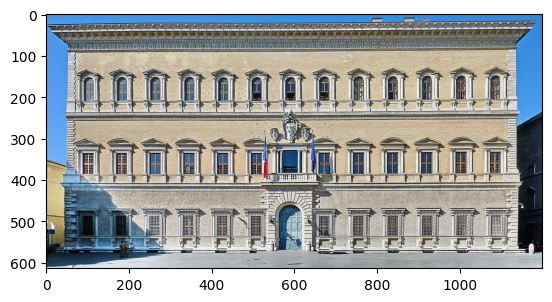

In [5]:
img = cv.imread('./Palazzo_Farnese_Fassade.jpg')
img = img[:,:,::-1]
plt.imshow(img)

# Exercício 1 - Rotação de uma Imagem

Agora, se baseando na função de base de rotação passada, criaremos a função my_rotation, com as matrizes de translação e rotação respectivamente seguindo:

```python
matriz_translacao = np.array([
    [1, 0, -centro[0]],
    [0 ,1, -centro[1]],
    [0, 0, 1]
])

matriz_rotacao = np.array([
    [np.cos(angulo), -np.sin(angulo), 0],
    [np.sin(angulo), np.cos(angulo), 0],
    [0, 0, 1]
])
```


In [6]:
def my_rotation(img, angulo, centro):
    
    # nessa primeira parte, vamos definir a transformação que leva a posicao dos pixels da imagem original
    # para a posicao dos pixels do imagem rotacionada.

    # a primeira matriz de translação muda a origem das coordenadas do canto da imagem para o centro da imagem
    matriz_translacao = np.array([
        [1, 0, -centro[0]],
        [0 ,1, -centro[1]],
        [0, 0, 1]
    ])

    # a matriz de rotacao aplica a rotacao em torno da origem
    matriz_rotacao = np.array([
        [np.cos(angulo), -np.sin(angulo), 0],
        [np.sin(angulo), np.cos(angulo), 0],
        [0, 0, 1]
    ])
    
    # a composicao coloca todas as matrizes em uma só: aplica a translacao (muda a origem), rotaciona, volta para a origem anterior
    matriz_composicao = np.linalg.inv(matriz_translacao) @ matriz_rotacao @ matriz_translacao

    # criar imagem rotacionada em preto, com mesmas dimensões da original
    lines, columns = img.shape[:2]
    rotated_image = np.zeros((lines, columns ,3), np.uint8)
    # o próximo passo é percorrer cada pixel da nova imagem e verificar qual é o pixel correspondente na imagem original

    for line in range(lines):
        for col in range(columns):
            pos_orig = np.array([line, col, 1])
            pos_rot = matriz_composicao @ pos_orig

            new_line = round(pos_rot[0])
            new_col = round(pos_rot[1])
        
            if (new_line >= 0 and new_line < lines) and (new_col >= 0 and new_col < columns):
                rotated_image[new_line, new_col] = img[line, col]
                
    return rotated_image

E então aplicaremos a função à nossa imagem, ao obter o resultado:

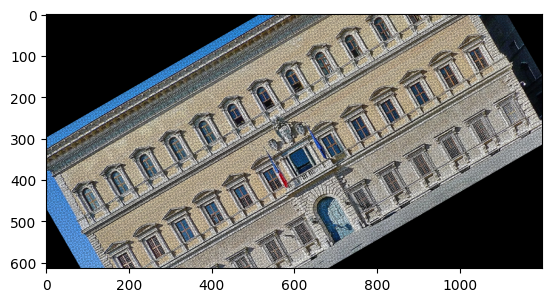

In [7]:
height, width = img.shape[:2]
centro = (height/2, width/2)
angulo = np.pi/6
my_rotated_image = my_rotation(img, angulo, centro)

plt.imshow(my_rotated_image)

Ao comparar com a função da biblioteca opencv, vemos que está funcionando corretamente.

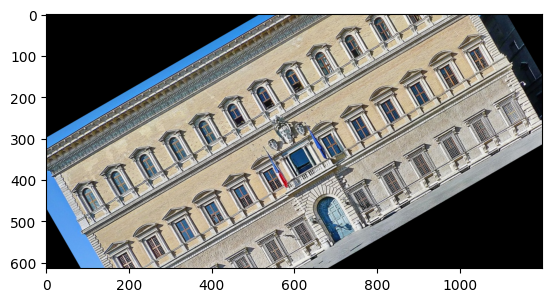

In [8]:
height, width = img.shape[:2]
center = (width/2, height/2)

# Definir a matriz de rota ̧c~ao
M = cv.getRotationMatrix2D(center, 30, 1)

# Aplicar a rota ̧c~ao na imagem
rotated_img = cv.warpAffine(img, M, (width, height))
plt.imshow(rotated_img)

# Exercício 2 - Transformação Projetiva de uma Imagem

Usaremos a nova imagem Palazzo Farnese Fassad para esta questão:

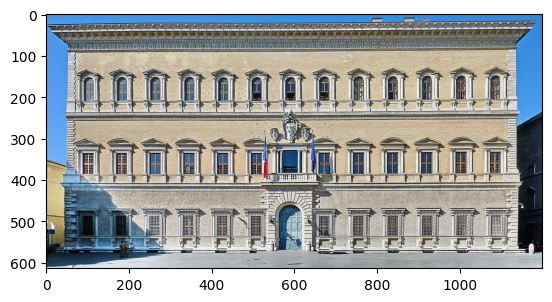

In [9]:
img = cv.imread('./Palazzo_Farnese_Fassade.jpg')
img = img[:,:,::-1]
plt.imshow(img)

In [10]:
def my_transform(img, T):
    lines, columns = img.shape[:2]
    transform_image = np.zeros((lines, columns, 3), dtype=np.uint8)

    for line in range(lines):
        for col in range(columns):
            pos_orig = np.array([line, col, 1])

            pos_transformed = T @ pos_orig
            
            new_col = int(round(pos_transformed[1]/pos_transformed[2]))
            new_line = int(round(pos_transformed[0]/pos_transformed[2]))
    
            if (new_line >= 0 and new_line < lines) and (new_col >= 0 and new_col < columns):
                transform_image[new_line, new_col] = img[line, col]

    return transform_image

Agora testaremos a função com a projeção no ponto (2000, 0):

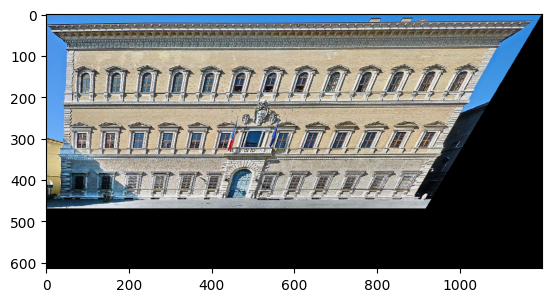

In [11]:
T = np.array([[1, 0, 0],
              [0, 1, 0],
              [1/2000, 0, 1]])

img_transform = my_transform(img, T)
plt.imshow(img_transform)

# Exercício 3 - Estimação da Transformação Projetiva

## 3.1 - Crie uma função

In [36]:
def my_estimation(lst1, lst2):
    matriz_origem = np.zeros((2,4))
    matriz_destino = np.zeros((2,4))

    for i in range(len(lst1)):
        ponto_origem = lst1[i]
        ponto_destino = lst2[i]

        matriz_origem[0,i] = ponto_origem[0]
        matriz_origem[1,i] = ponto_origem[1]

        matriz_destino[0,i] = ponto_destino[0]
        matriz_destino[1,i] = ponto_destino[1]


    estimation_T = np.linalg.lstsq(matriz_origem.T, matriz_destino.T, rcond=None)[0]

    return estimation_T

In [37]:
pontos_fonte = [[0, 0], [1, 0], [1, 1], [0, 1]]
pontos_destino = [[2, 3], [5, 3], [5, 6], [2, 6]]
ponto_a_transformar = [0.5, 0.5]
T = my_estimation(pontos_fonte, pontos_destino)
print(T)

[[4.33333333 2.        ]
 [1.33333333 5.        ]]


In [38]:
T @ np.array(ponto_a_transformar)

array([3.16666667, 3.16666667])